In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve, roc_auc_score
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv')

In [5]:
data

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [4]:
data.shape

(1000, 40)

In [12]:
data.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [3]:
data.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [11]:
data.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [16]:
data.drop(columns=['_c39'],inplace=True)

In [13]:
data

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,1,?,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


In [19]:
data['policy_state'].value_counts()

OH    352
IL    338
IN    310
Name: policy_state, dtype: int64

In [20]:
data['police_report_available'].value_counts()

?      343
NO     343
YES    314
Name: police_report_available, dtype: int64

In [6]:
le=LabelEncoder()

In [4]:
data.drop(columns=['policy_bind_date'],inplace=True)

In [18]:
data

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,OH,250/500,1000,1406.91,0,466132,MALE,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,IN,250/500,2000,1197.22,5000000,468176,MALE,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,OH,100/300,2000,1413.14,5000000,430632,FEMALE,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,IL,250/500,2000,1415.74,6000000,608117,FEMALE,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,IL,500/1000,1000,1583.91,6000000,610706,MALE,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,OH,500/1000,1000,1310.80,0,431289,FEMALE,...,1,?,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,186934,IL,100/300,1000,1436.79,0,608177,FEMALE,...,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,918516,OH,250/500,500,1383.49,3000000,442797,FEMALE,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,533940,IL,500/1000,2000,1356.92,5000000,441714,MALE,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


In [22]:
data.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_state',
       'policy_csl', 'policy_deductable', 'policy_annual_premium',
       'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

In [7]:
data['policy_state']=le.fit_transform(data['policy_state'])

In [8]:
data['police_report_available']=le.fit_transform(data['police_report_available'])

In [9]:
data.drop(columns=['insured_zip'], inplace=True)
data.drop(columns=['insured_sex'], inplace=True)
data.drop(columns=['insured_education_level'], inplace=True)
data.drop(columns=['insured_occupation'], inplace=True)
data.drop(columns=['insured_hobbies'], inplace=True)
data.drop(columns=['insured_relationship'], inplace=True)

In [10]:
data.drop(columns=['auto_make'], inplace=True)
data.drop(columns=['auto_model'], inplace=True)
data.drop(columns=['auto_year'], inplace=True)

In [27]:
data

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,...,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,48,521585,2,250/500,1000,1406.91,0,53300,0,...,1,YES,1,2,2,71610,6510,13020,52080,Y
1,228,42,342868,1,250/500,2000,1197.22,5000000,0,0,...,1,?,0,0,0,5070,780,780,3510,Y
2,134,29,687698,2,100/300,2000,1413.14,5000000,35100,0,...,3,NO,2,3,1,34650,7700,3850,23100,N
3,256,41,227811,0,250/500,2000,1415.74,6000000,48900,-62400,...,1,?,1,2,1,63400,6340,6340,50720,Y
4,228,44,367455,0,500/1000,1000,1583.91,6000000,66000,-46000,...,1,NO,0,1,1,6500,1300,650,4550,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,2,500/1000,1000,1310.80,0,0,0,...,1,YES,0,1,0,87200,17440,8720,61040,N
996,285,41,186934,0,100/300,1000,1436.79,0,70900,0,...,1,YES,2,3,0,108480,18080,18080,72320,N
997,130,34,918516,2,250/500,500,1383.49,3000000,35100,0,...,3,?,2,3,2,67500,7500,7500,52500,N
998,458,62,533940,0,500/1000,2000,1356.92,5000000,0,0,...,1,?,0,1,2,46980,5220,5220,36540,N


In [11]:
data.drop(data[data.police_report_available==0].index,inplace=True)

In [31]:
data['police_report_available'].value_counts()

1    343
2    314
Name: police_report_available, dtype: int64

In [32]:
data

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,...,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,48,521585,2,250/500,1000,1406.91,0,53300,0,...,1,YES,1,2,2,71610,6510,13020,52080,Y
2,134,29,687698,2,100/300,2000,1413.14,5000000,35100,0,...,3,NO,2,3,1,34650,7700,3850,23100,N
3,256,41,227811,0,250/500,2000,1415.74,6000000,48900,-62400,...,1,?,1,2,1,63400,6340,6340,50720,Y
4,228,44,367455,0,500/1000,1000,1583.91,6000000,66000,-46000,...,1,NO,0,1,1,6500,1300,650,4550,N
5,256,39,104594,2,250/500,1000,1351.10,0,0,0,...,3,NO,0,2,1,64100,6410,6410,51280,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991,257,44,109392,2,100/300,1000,1280.88,0,59400,-32200,...,1,NO,0,1,1,46980,0,5220,41760,N
992,94,26,215278,1,100/300,500,722.66,0,50300,0,...,3,YES,1,2,2,36700,3670,7340,25690,N
994,141,30,681486,1,500/1000,1000,1347.04,0,0,-82100,...,1,?,1,2,2,6480,540,1080,4860,N
997,130,34,918516,2,250/500,500,1383.49,3000000,35100,0,...,3,?,2,3,2,67500,7500,7500,52500,N


In [12]:
data['policy_annual_premium'] = data['policy_annual_premium'].astype(int)

In [13]:
data.drop(columns=['capital-gains'],inplace=True)

In [14]:
data.drop(columns=['capital-loss'],inplace=True)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 657 entries, 0 to 998
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   months_as_customer           657 non-null    int64 
 1   age                          657 non-null    int64 
 2   policy_number                657 non-null    int64 
 3   policy_state                 657 non-null    int32 
 4   policy_csl                   657 non-null    object
 5   policy_deductable            657 non-null    int64 
 6   policy_annual_premium        657 non-null    int32 
 7   umbrella_limit               657 non-null    int64 
 8   incident_date                657 non-null    object
 9   incident_type                657 non-null    object
 10  collision_type               657 non-null    object
 11  incident_severity            657 non-null    object
 12  authorities_contacted        657 non-null    object
 13  incident_state               657 no

In [38]:
data['incident_type']

0      Single Vehicle Collision
2       Multi-vehicle Collision
3      Single Vehicle Collision
4                 Vehicle Theft
5       Multi-vehicle Collision
                 ...           
991    Single Vehicle Collision
992     Multi-vehicle Collision
994                  Parked Car
997     Multi-vehicle Collision
998    Single Vehicle Collision
Name: incident_type, Length: 657, dtype: object

In [39]:
data['incident_type'].value_counts()

Multi-vehicle Collision     268
Single Vehicle Collision    267
Vehicle Theft                64
Parked Car                   58
Name: incident_type, dtype: int64

In [18]:
data['incident_type']=le.fit_transform(data['incident_type'])

In [19]:
data.drop(columns=['policy_csl'], inplace=True)
data.drop(columns=['injury_claim'], inplace=True)
data.drop(columns=['property_claim'], inplace=True)
data.drop(columns=['vehicle_claim'], inplace=True)

In [42]:
data

,months_as_customer,age,policy_number,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,incident_date,incident_type,collision_type,...,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,fraud_reported
0,328,48,521585,2,1000,1406,0,25-01-2015,2,Side Collision,...,Columbus,9935 4th Drive,5,1,YES,1,2,2,71610,Y
2,134,29,687698,2,2000,1413,5000000,22-02-2015,0,Rear Collision,...,Columbus,7121 Francis Lane,7,3,NO,2,3,1,34650,N
3,256,41,227811,0,2000,1415,6000000,10-01-2015,2,Front Collision,...,Arlington,6956 Maple Drive,5,1,?,1,2,1,63400,Y
4,228,44,367455,0,1000,1583,6000000,17-02-2015,3,?,...,Arlington,3041 3rd Ave,20,1,NO,0,1,1,6500,N
5,256,39,104594,2,1000,1351,0,02-01-2015,0,Rear Collision,...,Arlington,8973 Washington St,19,3,NO,0,2,1,64100,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991,257,44,109392,2,1000,1280,0,06-02-2015,2,Rear Collision,...,Riverwood,5312 Francis Ridge,21,1,NO,0,1,1,46980,N
992,94,26,215278,1,500,722,0,23-01-2015,0,Front Collision,...,Springfield,1705 Weaver St,6,3,YES,1,2,2,36700,N
994,141,30,681486,1,1000,1347,0,22-01-2015,1,?,...,Northbend,6516 Solo Drive,6,1,?,1,2,2,6480,N
997,130,34,918516,2,500,1383,3000000,23-01-2015,0,Side Collision,...,Arlington,7629 5th St,4,3,?,2,3,2,67500,N


In [20]:
data.drop(data[data.collision_type=='?'].index,inplace=True)
# This claim only be settle if it has some of incident with vehicle otherwise not.

In [21]:
data['collision_type']=le.fit_transform(data['collision_type'])

In [22]:
data.drop(columns=['incident_state'], inplace=True)
data.drop(columns=['incident_city'], inplace=True)
data.drop(columns=['incident_location'], inplace=True)
data.drop(columns=['incident_hour_of_the_day'], inplace=True)

In [46]:
data

,months_as_customer,age,policy_number,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,fraud_reported
0,328,48,521585,2,1000,1406,0,25-01-2015,2,2,Major Damage,Police,1,YES,1,2,2,71610,Y
2,134,29,687698,2,2000,1413,5000000,22-02-2015,0,1,Minor Damage,Police,3,NO,2,3,1,34650,N
3,256,41,227811,0,2000,1415,6000000,10-01-2015,2,0,Major Damage,Police,1,?,1,2,1,63400,Y
5,256,39,104594,2,1000,1351,0,02-01-2015,0,1,Major Damage,Fire,3,NO,0,2,1,64100,Y
7,165,37,429027,0,1000,1137,0,27-02-2015,0,0,Total Loss,Police,3,?,2,2,2,51590,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,286,43,663190,0,500,1564,3000000,31-01-2015,2,1,Minor Damage,Fire,1,?,2,2,2,34290,N
991,257,44,109392,2,1000,1280,0,06-02-2015,2,1,Total Loss,Other,1,NO,0,1,1,46980,N
992,94,26,215278,1,500,722,0,23-01-2015,0,0,Major Damage,Fire,3,YES,1,2,2,36700,N
997,130,34,918516,2,500,1383,3000000,23-01-2015,0,2,Minor Damage,Police,3,?,2,3,2,67500,N


In [23]:
data.drop(columns=['incident_date'], inplace=True)

In [24]:
data['incident_severity']=le.fit_transform(data['incident_severity'])

In [50]:
data['authorities_contacted']=le.fit_transform(data['authorities_contacted'])

In [51]:
data['property_damage']=le.fit_transform(data['property_damage'])

In [52]:
data['fraud_reported']=le.fit_transform(data['fraud_reported'])

In [53]:
data

,months_as_customer,age,policy_number,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,incident_type,collision_type,incident_severity,authorities_contacted,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,fraud_reported
0,328,48,521585,2,1000,1406,0,2,2,0,3,1,2,1,2,2,71610,1
2,134,29,687698,2,2000,1413,5000000,0,1,1,3,3,1,2,3,1,34650,0
3,256,41,227811,0,2000,1415,6000000,2,0,0,3,1,0,1,2,1,63400,1
5,256,39,104594,2,1000,1351,0,0,1,0,1,3,1,0,2,1,64100,1
7,165,37,429027,0,1000,1137,0,0,0,2,3,3,0,2,2,2,51590,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,286,43,663190,0,500,1564,3000000,2,1,1,1,1,0,2,2,2,34290,0
991,257,44,109392,2,1000,1280,0,2,1,2,2,1,1,0,1,1,46980,0
992,94,26,215278,1,500,722,0,0,0,0,1,3,2,1,2,2,36700,0
997,130,34,918516,2,500,1383,3000000,0,2,1,3,3,0,2,3,2,67500,0


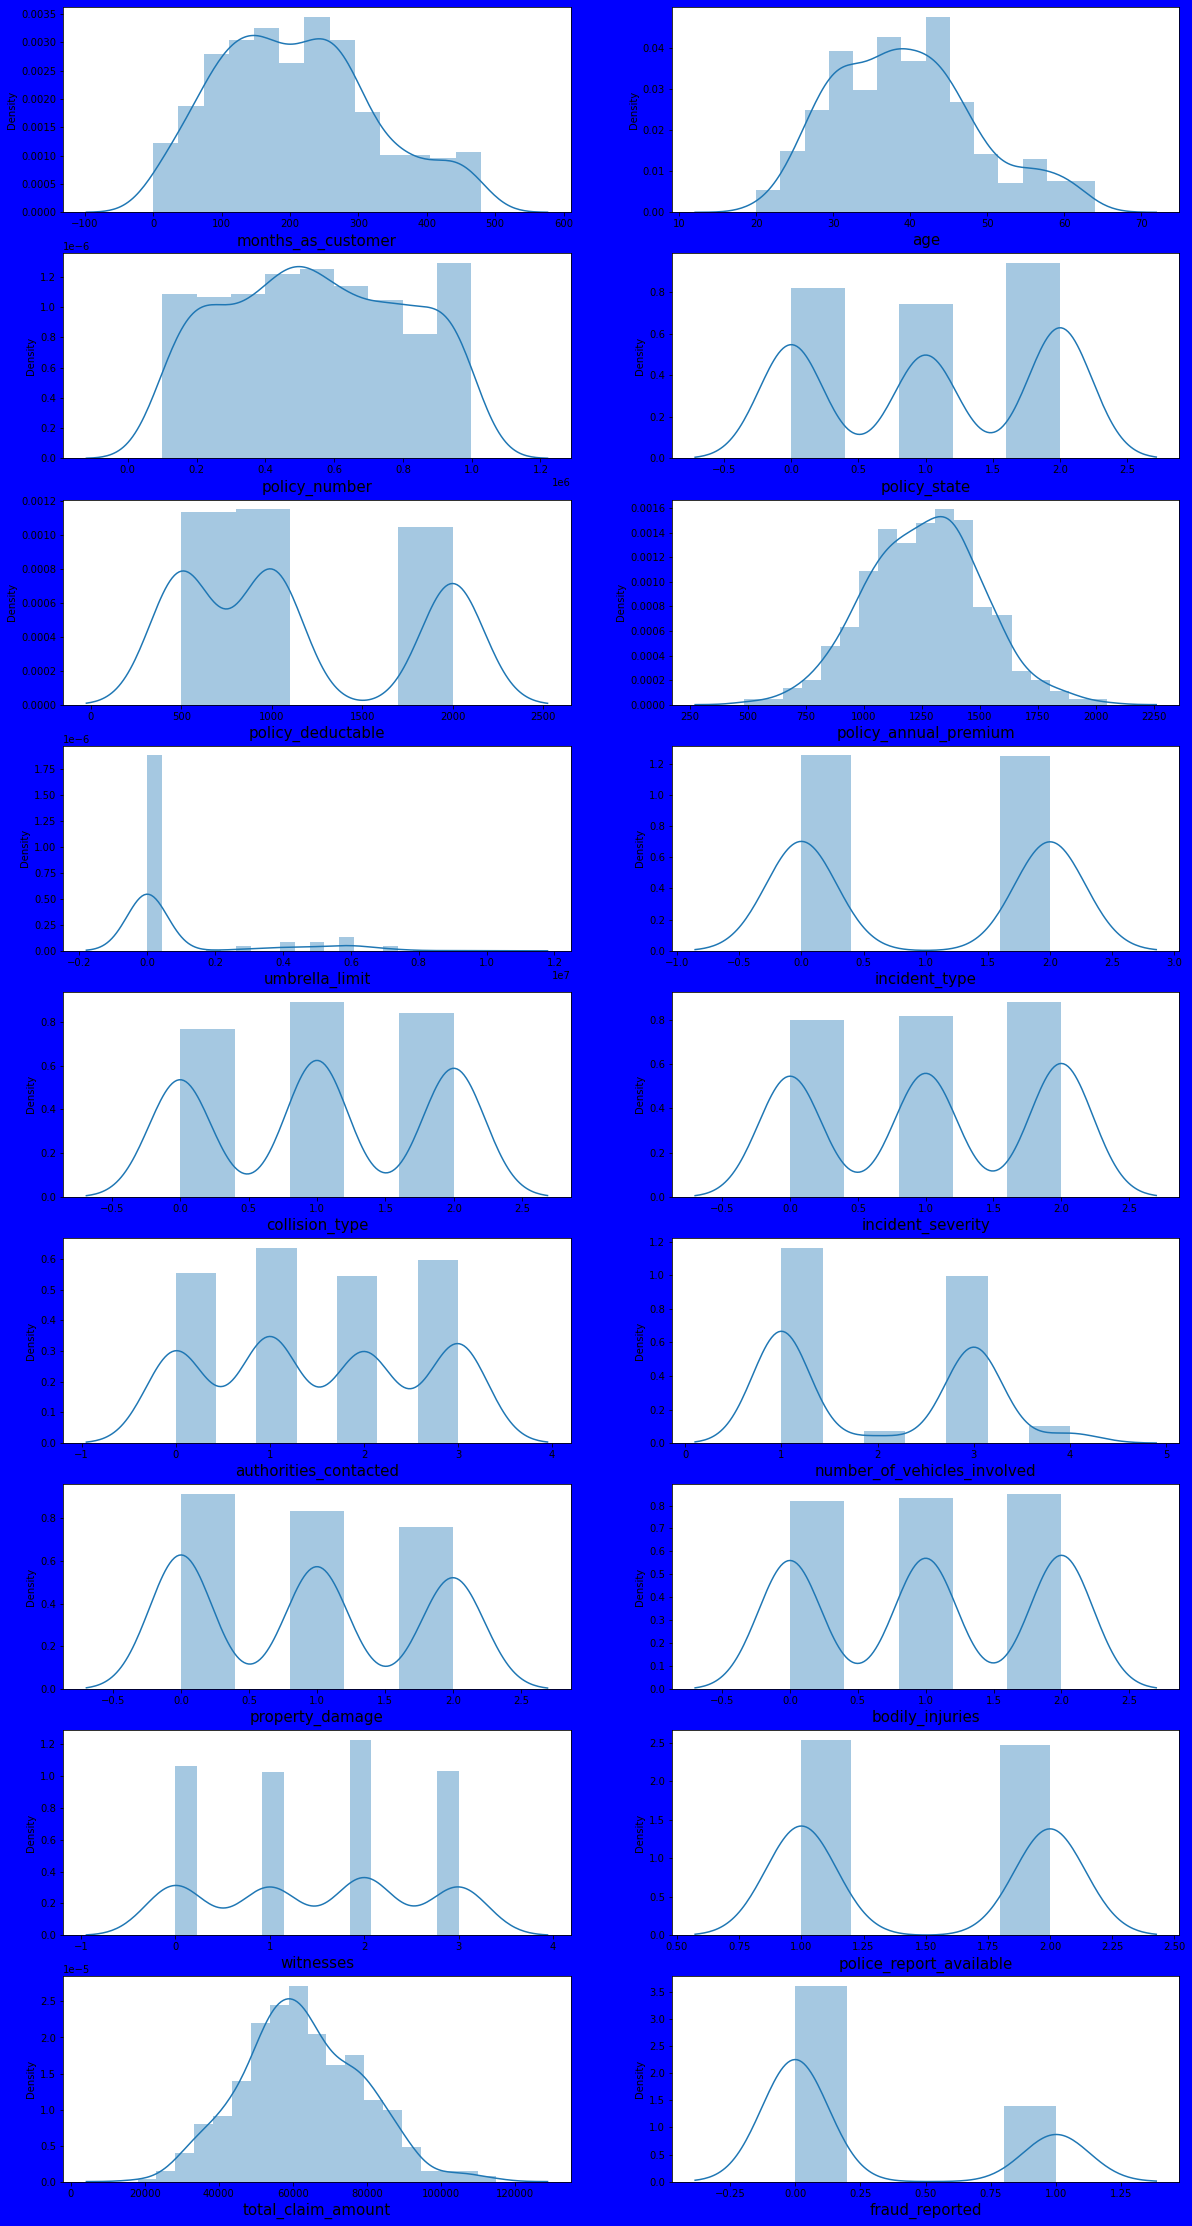

In [54]:
plt.figure(figsize=(20,40), facecolor='blue')
plotnumber=1

for column in data:
    if plotnumber<=18 :
        ax= plt.subplot(9,2,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=15)
        
    plotnumber+=1
plt.show()

In [57]:
data.corr()

,months_as_customer,age,policy_number,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,incident_type,collision_type,incident_severity,authorities_contacted,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,fraud_reported
months_as_customer,1.000000,0.941062,0.051602,0.021086,0.064775,0.008068,0.002477,-0.003604,-0.084284,-0.050836,0.023237,0.001748,0.003101,-0.017203,0.043111,-0.055060,0.067975,0.017630
age,0.941062,1.000000,0.056554,0.005985,0.062101,0.024400,-0.031907,-0.005146,-0.081113,-0.051251,0.020823,0.008510,-0.011031,-0.023510,0.037305,-0.056587,0.065267,-0.006127
policy_number,0.051602,0.056554,1.000000,0.105546,-0.032144,0.047765,-0.035102,0.000775,-0.015469,-0.005913,0.052040,-0.010465,0.007403,-0.019445,0.044786,0.027814,0.015979,-0.011472
policy_state,0.021086,0.005985,0.105546,1.000000,0.011829,-0.015998,0.002562,0.044776,0.059150,-0.035083,0.039724,-0.051962,0.020848,0.020945,0.054081,0.005227,-0.024864,0.063568
policy_deductable,0.064775,0.062101,-0.032144,0.011829,1.000000,-0.043138,-0.047500,-0.087687,-0.084578,-0.035558,0.026920,0.079280,0.043833,-0.048394,0.071875,0.033452,0.076488,0.030879
policy_annual_premium,0.008068,0.024400,0.047765,-0.015998,-0.043138,1.000000,-0.003697,0.044405,0.017804,-0.038004,-0.074411,-0.049388,0.078884,0.083220,-0.006567,0.025948,0.002222,0.023377
umbrella_limit,0.002477,-0.031907,-0.035102,0.002562,-0.047500,-0.003697,1.000000,0.000842,-0.003480,-0.005456,-0.009008,0.013105,-0.035829,0.071246,0.014419,-0.017250,-0.042065,0.047806
incident_type,-0.003604,-0.005146,0.000775,0.044776,-0.087687,0.044405,0.000842,1.000000,-0.093236,-0.027290,0.007577,-0.966422,0.043458,-0.034297,-0.016093,0.024277,0.090560,0.038689
collision_type,-0.084284,-0.081113,-0.015469,0.059150,-0.084578,0.017804,-0.003480,-0.093236,1.000000,0.041158,0.085713,0.090703,0.031463,-0.009166,-0.078732,0.070473,-0.087315,-0.033596
incident_severity,-0.050836,-0.051251,-0.005913,-0.035083,-0.035558,-0.038004,-0.005456,-0.027290,0.041158,1.000000,0.094017,0.008117,-0.005291,-0.025787,-0.050121,0.027906,-0.048896,-0.468117


In [58]:
x=data.drop(columns=['fraud_reported'])
y=data['fraud_reported']

In [59]:
scalar=StandardScaler()
x_scaled= scalar.fit_transform(x)

In [60]:
x_scaled.shape

(535, 17)

In [61]:
x_train,x_test,y_train,y_test= train_test_split(x_scaled,y,test_size=0.25,random_state=264)

In [62]:
LR=LogisticRegression()

In [63]:
LR.fit(x_train,y_train)

LogisticRegression()

In [64]:
y_pred=LR.predict(x_test)

In [65]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.7910447761194029

In [66]:
CF=confusion_matrix(y_test,y_pred)
CF

array([[83,  9],
       [19, 23]], dtype=int64)

In [67]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.90      0.86        92
           1       0.72      0.55      0.62        42

    accuracy                           0.79       134
   macro avg       0.77      0.72      0.74       134
weighted avg       0.78      0.79      0.78       134



In [68]:
auc_score=roc_auc_score(y_test,y_pred)
auc_score

0.724896480331263